In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/0_Raw_Samples/Trim_QC/allReads/"
folder=glob.glob(InPath+"*1P_fastqc")
len(folder)

74

In [3]:
for i in range(len(folder)):
    pathToFile = folder[i]
    samName = "_".join(pathToFile.split("/")[-1].split("_")[0:4])
    
    pathWithFile = pathToFile + "/fastqc_data.txt"

    started = False
    contents, counts = [], []
    with open(pathWithFile, "r") as f:
        for line in f.readlines():
            if not started:
                spl = [s.strip() for s in line.split()]
                # print(spl)
                if spl == ["#GC", "Content", "Count"]:
                    started = True
            else:
                spl = line.split()
                if spl == [">>END_MODULE"]:
                    break
                assert len(spl) == 2
                content, count = spl
                contents.append(int(content.strip()))
                counts.append(float(count.strip()))
                
    if i==0:
        df_final = pd.DataFrame({
            "GCcontent": contents,
            "Count_" + samName: counts
        })
    else:
        df_merge = pd.DataFrame({
            "GCcontent": contents,
            "Count_" + samName: counts
        })
        
        df_final = df_final.merge(df_merge, on="GCcontent", how="outer")
    #contents_counts = np.stack([contents, counts])

df_final

,GCcontent,Count_VU_bb_1_4,Count_NIOO_M00_1_3,Count_RUG_bb_15_3,Count_VU_bb_15_5,Count_VU_bb_0_3,Count_NIOO_A00_1_1,Count_Gent_bb_15_2,Count_VU_bb_15_2,Count_NIOO_bb_1_1,...,Count_VU_bn50_15_1,Count_VU_bn50_0_3,Count_NIOO_M00_15_1,Count_NIOO_M00_1_5,Count_VU_bn5_0_1,Count_VU_bn50_15_2,Count_Gent_bb_15_3,Count_Gent_bb_1_4,Count_VU_bn50_0_2,Count_VU_bb_1_2
0,0,984.0,26.0,463.0,328.0,498.0,834.0,376.0,154.0,576.0,...,551.0,860.0,994.0,237.0,1481.0,743.0,623.0,712.0,976.0,690.0
1,1,934.5,29.5,537.0,393.0,588.5,611.5,428.0,169.5,552.5,...,502.0,765.0,741.0,162.0,1233.0,752.0,661.5,749.0,866.5,755.5
2,2,831.5,32.0,556.5,430.0,639.0,363.5,474.0,171.0,491.5,...,387.0,583.0,431.0,83.5,901.0,729.0,612.5,753.5,618.5,758.5
3,3,858.0,29.5,518.0,441.5,660.0,323.5,500.5,184.0,466.0,...,341.5,523.5,371.0,70.5,795.5,748.0,562.5,778.0,498.5,769.0
4,4,1162.5,38.0,665.5,554.0,894.0,329.5,639.5,235.0,562.5,...,434.0,686.0,386.0,66.5,933.0,959.5,741.0,1071.0,646.5,1096.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,271.0,1199.5,89.5,237.0,134.5,363.5,133.0,400.0,605.5,...,526.5,376.5,935.0,847.0,523.0,224.0,282.0,121.0,473.5,140.5
97,97,231.5,918.0,60.5,144.5,77.5,281.5,68.5,289.0,521.0,...,383.5,311.5,750.5,610.5,434.5,162.5,201.0,104.0,393.0,104.5
98,98,201.5,801.5,39.5,142.0,34.0,255.0,48.0,233.0,457.5,...,312.5,295.0,695.5,532.0,384.5,134.0,160.5,94.5,334.5,93.0
99,99,145.0,507.5,24.5,97.5,22.0,178.5,28.5,155.0,333.5,...,214.0,227.0,479.0,342.5,289.0,84.0,107.0,63.5,231.0,78.5


/tmp/ipykernel_23958/3380789897.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, df_final_woGCcontent.mean(1), 'k', color='#CC4F1B')


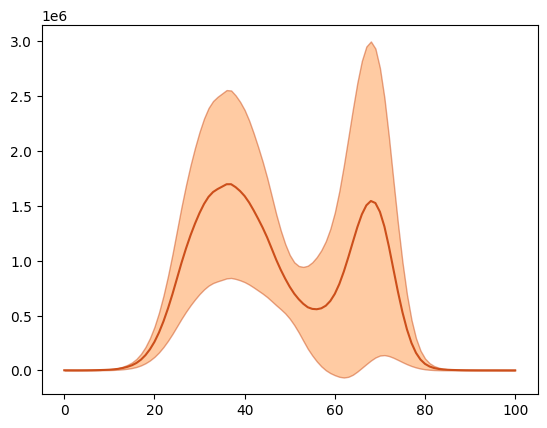

In [4]:
df_final_woGCcontent = df_final.drop(columns="GCcontent")
x = df_final["GCcontent"]
y = df_final_woGCcontent.mean(1)
error = df_final_woGCcontent.std(1)

plt.plot(x, df_final_woGCcontent.mean(1), 'k', color='#CC4F1B')
plt.fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')


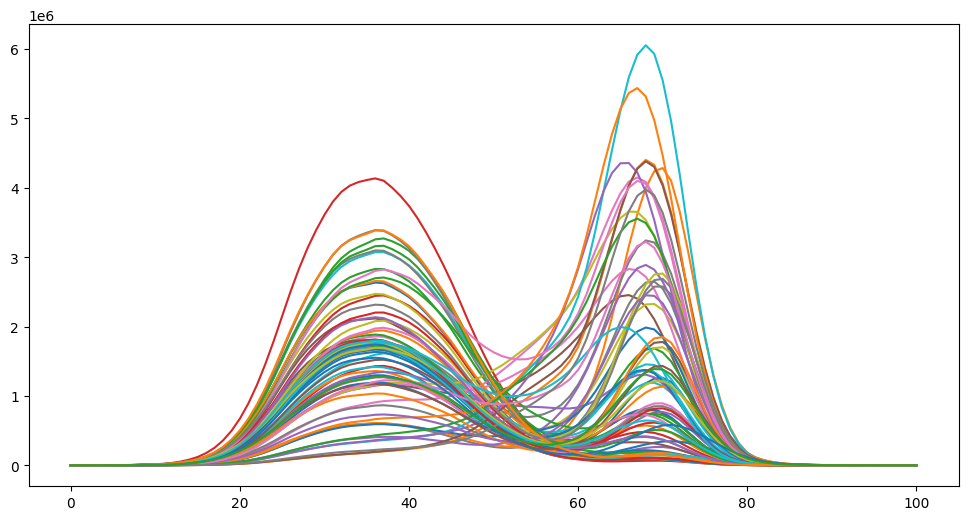

In [5]:

fig, ax = plt.subplots(figsize=[12,6])

for i in range(1,len(folder)):
    ax.plot(x,df_final.iloc[:,i])

In [6]:
#### find curves with specific features:
noSec_below   = 0.5e6 # these have nothing at the between 60 and 80 position
lowSec_below  = 1e6   # low second bump, below 1e6 - start we dont care about
highSec_above = 1e6

collect_Cat = np.empty(len(folder),dtype=str)

for i in range(len(folder)):
    # get numbers from range
    _range = df_final.iloc[60:80,i+1]
    if any(_range >= noSec_below)==True:
        collect_Cat[i] = "h"
    if any(_range >= lowSec_below)==False:
        collect_Cat[i] = "l"
    if any(_range >= noSec_below)==False:
        collect_Cat[i] = "n"
collect_Cat

array(['h', 'h', 'n', 'l', 'n', 'h', 'n', 'h', 'h', 'h', 'l', 'h', 'h',
       'n', 'l', 'n', 'h', 'h', 'h', 'h', 'n', 'l', 'n', 'n', 'h', 'h',
       'h', 'h', 'h', 'h', 'n', 'n', 'l', 'n', 'h', 'n', 'l', 'l', 'n',
       'h', 'h', 'h', 'l', 'l', 'h', 'n', 'l', 'n', 'h', 'n', 'h', 'h',
       'l', 'l', 'n', 'h', 'h', 'h', 'n', 'h', 'n', 'h', 'h', 'n', 'h',
       'h', 'h', 'h', 'h', 'l', 'l', 'n', 'h', 'l'], dtype='<U1')

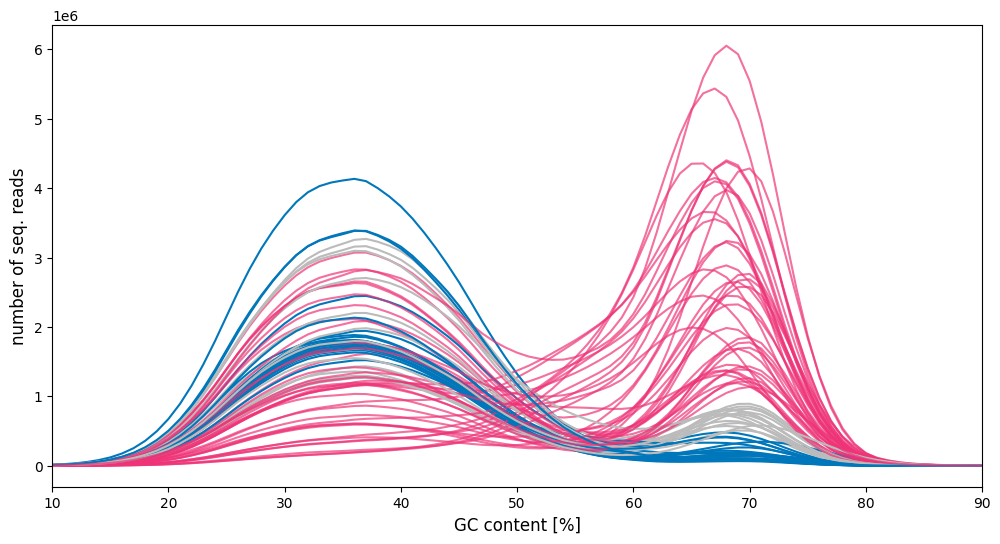

In [26]:
fig, ax = plt.subplots(figsize=[12,6])

for i in range(1,len(folder)):
    if collect_Cat[i-1]=="l":
        ax.plot(x,df_final.iloc[:,i],color="#BBBBBB",alpha=1)
    if collect_Cat[i-1]=="h":
        ax.plot(x,df_final.iloc[:,i],color="#EE3377",alpha=0.7)
    if collect_Cat[i-1]=="n":
        ax.plot(x,df_final.iloc[:,i],color="#0077BB",alpha=1)

ax.set_xlabel("GC content [%]", fontsize=12)
ax.set_ylabel("number of seq. reads", fontsize=12)
ax.set_xlim([10,90])

plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/0_Raw_Samples/Trim_QC/' + 'GCcontent_CE.png',
            dpi=200, bbox_inches='tight')